<a href="https://colab.research.google.com/github/jainakki16/Chat-Transcript-Analysis/blob/main/Analysis_of_the_Chat_Transcript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of the Chat transcript 

Data will be collected from the chat transcripts of different courses to extract the different information 
regarding interaction of the students, types of question, innovative ideas etc.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


# Importing Libraries

In [ ]:
!pip install python-docx --quiet
!pip install pyspellchecker --quiet

     |████████████████████████████████| 5.6 MB 4.2 MB/s 
     |████████████████████████████████| 2.7 MB 4.1 MB/s 


In [ ]:
import os
import re
import docx
import operator
import numpy as np
import pandas as pd
from collections import defaultdict

import seaborn as sns
from matplotlib import pyplot as plt

import scipy
from scipy.spatial import distance
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.corpus import stopwords

sns.set_style('darkgrid')
nltk.download("punkt")
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Reading Data

In [ ]:
def read_data(path):
  time = []
  name = []
  chat = []

  document = docx.Document(path)

  for para in document.paragraphs:
    line = para.text.split()
    if len(line) > 1:
      time.append(line[0])
      name.append(line[1] + ' ' + line[2][:-1])
      chat.append(' '.join(line[3:]))

  data = pd.DataFrame({'Time': time, 'Name': name, 'Chat': chat})

  return data

In [ ]:
def create_dataset():
  dir_path = '/content/gdrive/MyDrive/R&D Project'
  dir_all_path = sorted(os.listdir(dir_path))
  data = {}

  student_number = 1
  replace_name = {}
  student_number = 1
  teacher_number = 1

  for i in range(len(dir_all_path)):
    path = dir_path + '/' + dir_all_path[i]
    if path.endswith('.docx'):
      data[f'data_{i + 1}'] = read_data(path)
      new_name = []
      for name in data[f'data_{i + 1}']['Name']:
        if name == 'Ratna Sanyal':
          replace_name[name] = 'teacher_' + str(teacher_number)
        elif name not in replace_name:
          replace_name[name] = 'student_' + str(student_number)
          student_number += 1
        new_name.append(replace_name[name])

      data[f'data_{i + 1}']['Name'] = new_name
  
  return data, replace_name

In [ ]:
dataset, student_names = create_dataset()

# Number of questions asked by faculty


In [ ]:
def get_professor_question(data, professor_name):
  return data[data['Name'] == professor_name]

def get_marks(marks_lists):
  return np.random.choice(marks_lists, p=[0.1, 0.1, 0.2, 0.3, 0.3])

In [ ]:
j = 0
all_ques_count = []

for i in dataset:
  j += 1
  ques_count = get_professor_question(dataset[i], 'teacher_1').shape[0]
  all_ques_count.append(ques_count)

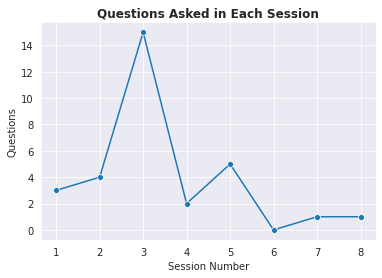

In [ ]:
sns.lineplot(x=list(range(1, len(all_ques_count) + 1)), y=all_ques_count, marker = 'o')
plt.title('Questions Asked in Each Session', weight = 'bold')
plt.xlabel('Session Number')
plt.ylabel('Questions')
plt.show()

# Questions asked by faculty with their timestamp

In [ ]:
j = 0
for i in dataset:
  j += 1
  if get_professor_question(dataset[i], 'teacher_1')[['Time', 'Chat']].shape[0] != 0:
      print(f"Questions asked by faculty with their timestamp in session-{j} : \n\n \
     {get_professor_question(dataset[i], 'teacher_1')[['Time', 'Chat']]}\n")

Questions asked by faculty with their timestamp in session-1 : 

              Time                                      Chat
0   00:16:01             give examples of prepositions
8   00:20:50  change position of prepositional phrases
21  00:54:02     In SRS document, how can we apply NLP

Questions asked by faculty with their timestamp in session-2 : 

               Time                                 Chat
0    00:12:59        Give the example for Homonyms
39   00:30:10         Can you example for antonyms
78   00:38:44  Write example for Hyponymy/Hypernym
110  00:45:48            Write example for Meronym

Questions asked by faculty with their timestamp in session-3 : 

              Time                         Chat
0   00:29:14  I'd like to fly from A to B
2   00:31:05                           S-
7   00:33:35                     I'd like
8   00:33:40                       to fly
9   00:33:56                      S-NP PP
10  00:34:14                          I'd
11  00:34:21    

# Most frequent words in question

In [ ]:
def get_top_five(dic):
  sorted_dict = dict(sorted(dic.items(), key=operator.itemgetter(1), reverse=True))
  top_five = {k: sorted_dict[k] for k in list(sorted_dict)[:5]}
  return top_five


Session - 1



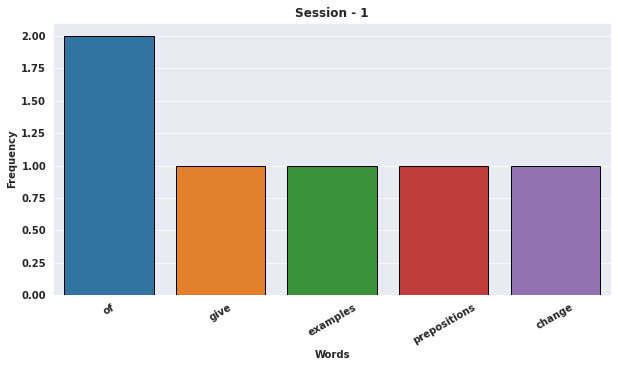


Session - 2



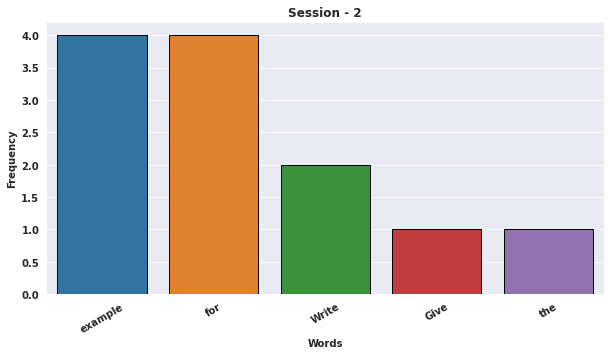


Session - 3



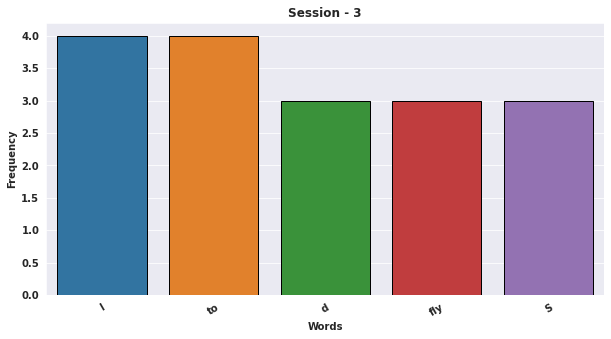


Session - 4



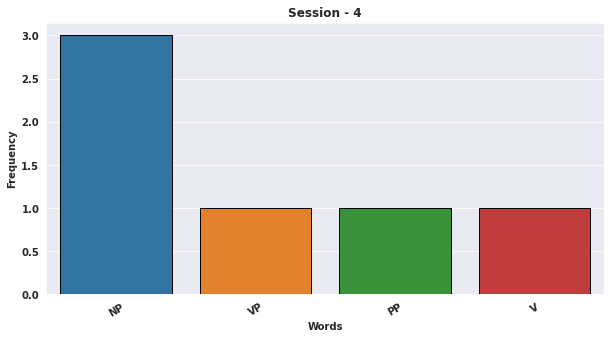


Session - 5



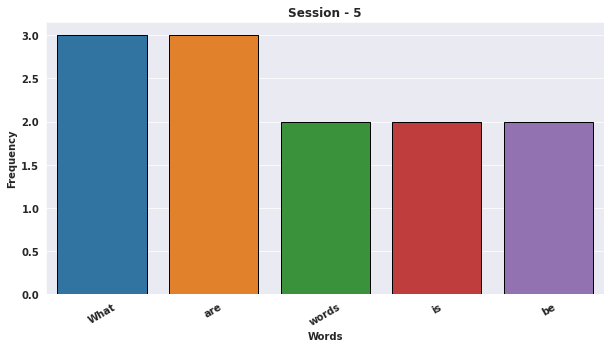


Session - 7



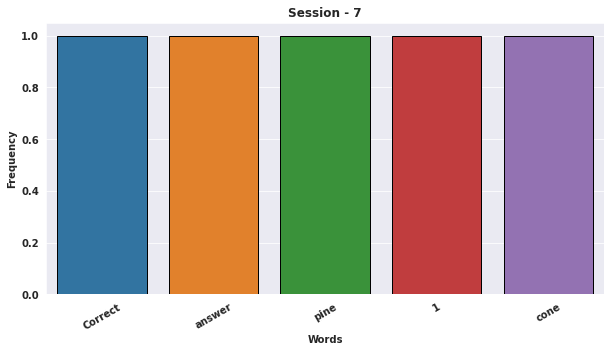


Session - 8



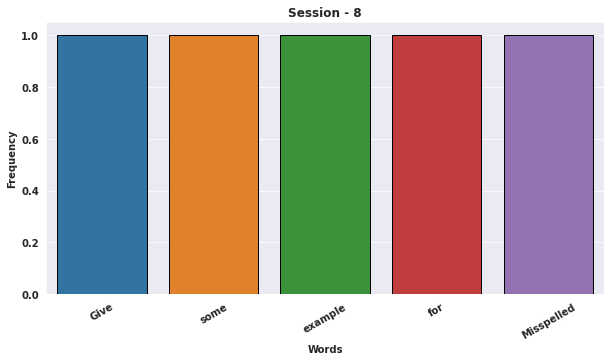

In [ ]:
j = 0
for i in dataset:
  j += 1

  session = ' '.join(get_professor_question(dataset[i], 'teacher_1')['Chat'].tolist())
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  session = tokenizer.tokenize(session)

  if session != []:

    word_count = {}
    for word in session:
      if word in word_count:
        word_count[word] += 1
      else:
        word_count[word] = 1
    
    print(f'\nSession - {j}\n')
    plt.figure(figsize=(10, 5))

    word_count = get_top_five(word_count)
    word_count_keys = list(word_count.keys())

    sns.barplot(x = word_count_keys, y = [word_count[k] for k in word_count_keys], edgecolor = 'black')
    plt.xticks(rotation=30, weight = 'bold')
    plt.yticks(weight = 'bold')
    plt.title(f'Session - {j}', weight = 'bold')
    plt.ylabel('Frequency', weight = 'bold')
    plt.xlabel('Words', weight = 'bold')
    plt.show()

# Total number of responses in each lecture

In [ ]:
def get_ans_count(data):
  return data[data['Name'] != 'teacher_1']['Name'].value_counts()

j = 0
total_student_response = {}
for i in dataset:
  j += 1
  print(f'Total number of responses by students in session-{j} : {get_ans_count(dataset[i]).sum()}')
  total_student_response[f'Session-{j}'] = get_ans_count(dataset[i]).sum()

Total number of responses by students in session-1 : 26
Total number of responses by students in session-2 : 140
Total number of responses by students in session-3 : 15
Total number of responses by students in session-4 : 8
Total number of responses by students in session-5 : 52
Total number of responses by students in session-6 : 19
Total number of responses by students in session-7 : 3
Total number of responses by students in session-8 : 16


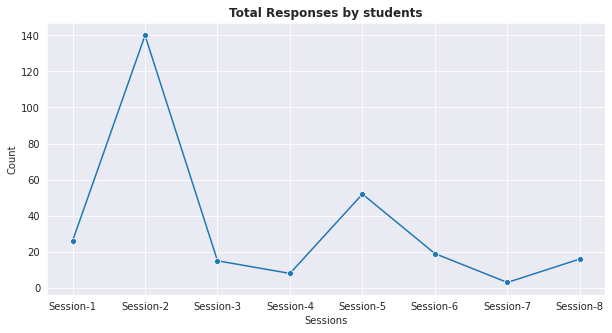

In [ ]:
plt.figure(figsize=(10, 5))

total_student_response_keys = list(total_student_response.keys())
sns.lineplot(x = total_student_response_keys, 
             y = [total_student_response[k] for k in total_student_response_keys], 
             marker = "o")

plt.title('Total Responses by students', weight = 'bold')
plt.ylabel('Count')
plt.xlabel('Sessions')
plt.show()  

# Number of responses by each student

In [ ]:
def get_response_data(data):
  j = 1
  all_num_responses = {}

  for i in data:
    session_data = get_ans_count(data[i])
    for index, value in session_data.items():
      if j == 1:
        all_num_responses[index] = [value]
      else:
        if index not in all_num_responses:
          all_num_responses[index] = [0]
          while len(all_num_responses[index]) != j - 1: 
            all_num_responses[index].append(0)
        all_num_responses[index].append(value)

    for key, value in all_num_responses.items():
      if len(value) != j:
        while len(all_num_responses[key]) != j: 
            all_num_responses[key].append(0)
    j += 1


  all_session = []

  for i in range(len(data)):
    each_session = []
    for value in all_num_responses.values():
        each_session.append(value[i])
    all_session.append(each_session)

  total_session = []

  for i in range(len(all_session[0])):
    each_total = 0
    for j in range(len(all_session)):
      each_total += all_session[j][i]
    total_session.append(each_total)

  response_dic = {'student_name': list(all_num_responses.keys()), 'total_response': total_session}
  for i in range(len(data)):
    response_dic[f'session-{i + 1}'] = all_session[i]

  response_data = pd.DataFrame(response_dic).sort_values('total_response', ascending = False).head(n = 15).reset_index(drop=True)
  return response_data

In [ ]:
response_data = get_response_data(dataset)

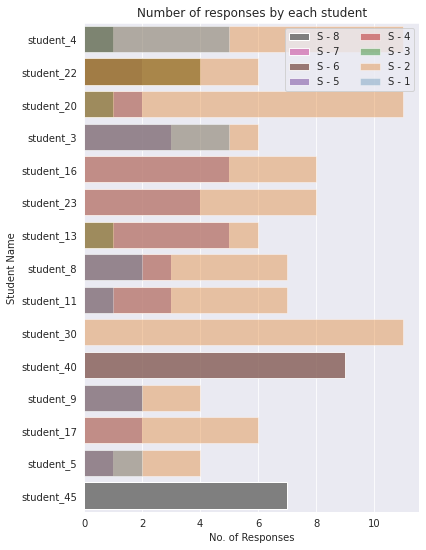

In [ ]:
plt.figure(figsize=(6, 9))
color = list(sns.color_palette())
alpha = 1
for i in range(len(dataset), 0, -1):
  kwargs = {'alpha':alpha}
  sns.barplot(x=f"session-{i}", y="student_name", data=response_data, label=f"S - {i}", color=color[i-1], **kwargs)
  alpha -= 0.1

plt.xlabel('No. of Responses')
plt.ylabel('Student Name')
plt.title('Number of responses by each student')
plt.legend(ncol = 2)
plt.show()

# Responses For Each Question

In [ ]:
def response_after_question(data):
  data_copy = data.copy(deep = True)
  data_copy.loc[len(data_copy.index)] = [' ', 'teacher_1', ' ']
  ques_index = data_copy.index[data_copy['Name'] == 'teacher_1'].tolist()
  
  all_responses = []
  for i in range(len(ques_index) - 1):
    all_responses.append(get_ans_count(data_copy[ques_index[i] + 1 : ques_index[i + 1]]).sum())
  return all_responses

In [ ]:
def get_all_responses(data):
  j = 0
  all_responses = []
  for i in data:
    j += 1
    all_responses.append(response_after_question(data[i]))

  max_length = len(max(all_responses, key=len))
  for i in range(len(data)):
    if len(all_responses[i]) != max_length:
      diff = max_length - len(all_responses[i])
      all_responses[i].extend([0]*diff)

  return all_responses, max_length

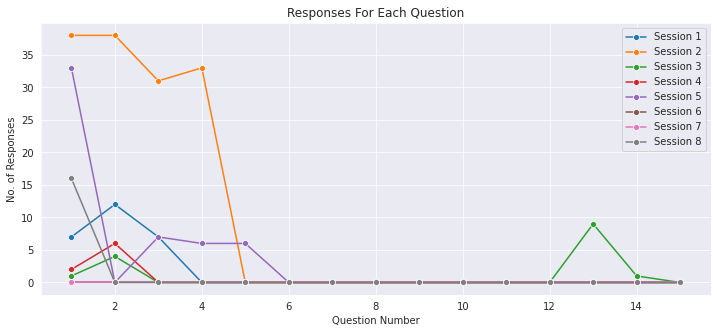

In [ ]:
all_responses, max_length = get_all_responses(dataset)

plt.figure(figsize=(12, 5))
for i in range(len(all_responses)):
  sns.lineplot(x = range(1, max_length + 1), y = all_responses[i], marker = 'o', label = f'Session {i + 1}')

plt.xlabel('Question Number')
plt.ylabel('No. of Responses')
plt.title('Responses For Each Question')
plt.show()

# Most Frequent Words in Responses

In [ ]:
def get_student_responses(data, professor_name):
  return data[data['Name'] != professor_name]


Session - 1



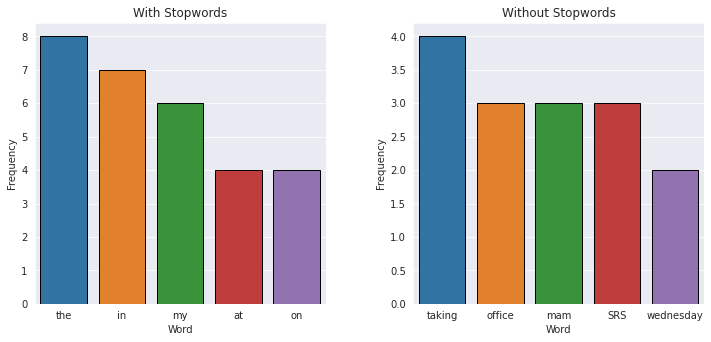


Session - 2



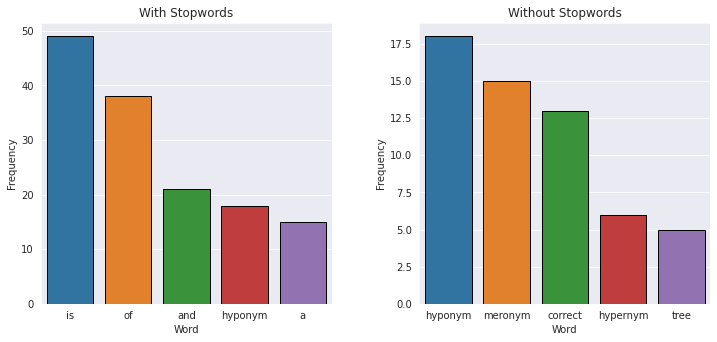


Session - 3



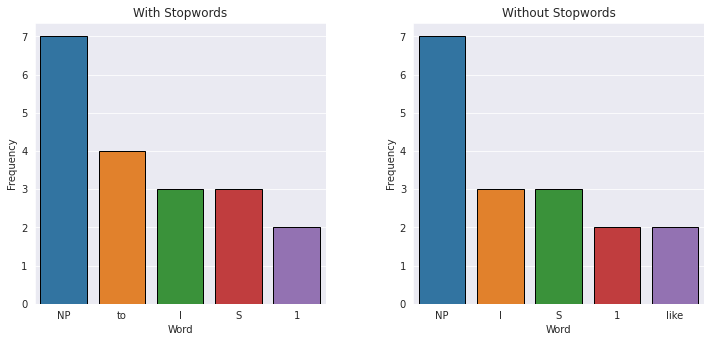


Session - 4



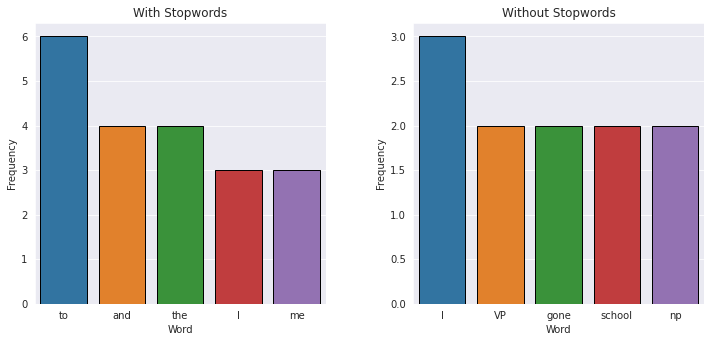


Session - 5



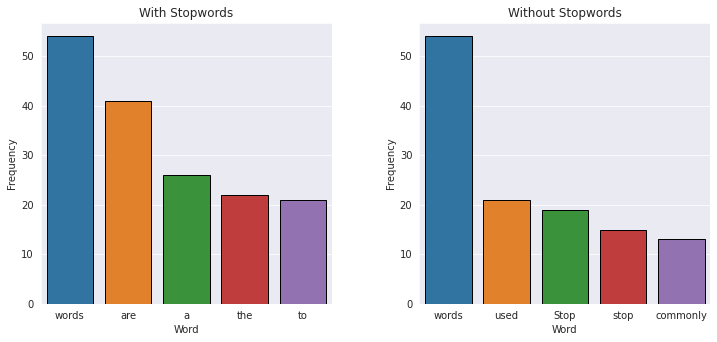


Session - 6



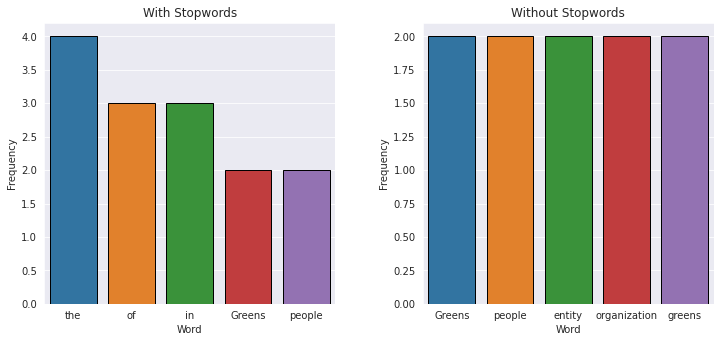


Session - 7



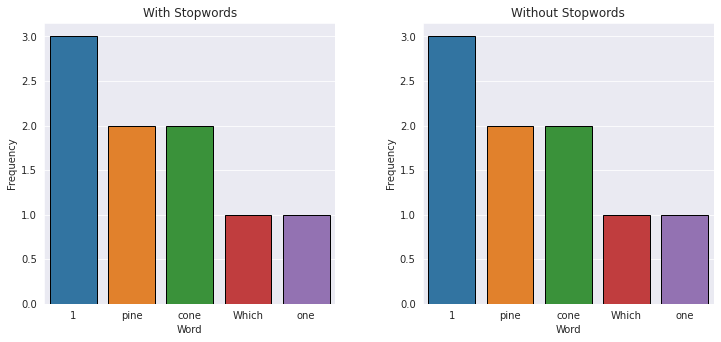


Session - 8



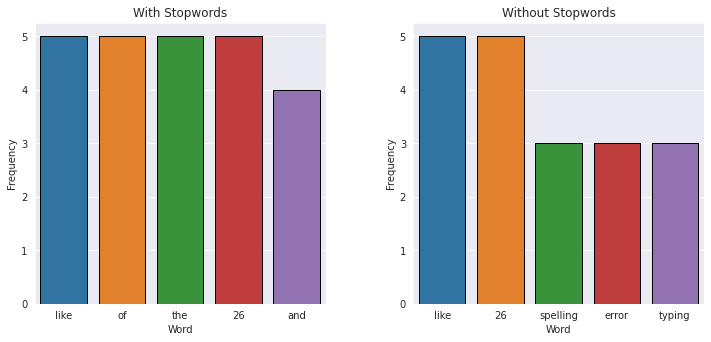

In [ ]:
j = 0
for i in dataset:
  j += 1

  responses = ' '.join(get_student_responses(dataset[i], 'teacher_1')['Chat'].tolist())
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  responses = tokenizer.tokenize(responses)

  if responses == []:
    continue

  word_count_1 = {}
  for word in responses:
    if word in word_count_1:
      word_count_1[word] += 1
    else:
      word_count_1[word] = 1

  # ---- dictionary without stopword -----
  dict_without_stop = word_count_1.copy()
  for k in stopwords:
    if k in word_count_1:
      dict_without_stop.pop(k)

  word_count_1 = get_top_five(word_count_1)
  word_count_keys_1 = list(word_count_1.keys())

  dict_without_stop = get_top_five(dict_without_stop)
  dict_without_stop_keys = list(dict_without_stop.keys())

  print(f'\nSession - {j}\n')
  f, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(12,5), edgecolor='k')
  f.subplots_adjust(hspace=0.5, wspace=0.3, bottom = 0.1)
  sns.barplot(x = word_count_keys_1, y = [word_count_1[k] for k in word_count_keys_1], edgecolor = 'black', ax=axes[0])
  sns.barplot(x = dict_without_stop_keys, y = [dict_without_stop[k] for k in dict_without_stop_keys], edgecolor = 'black', ax=axes[1])

  axes[0].set_title('With Stopwords')
  axes[0].set_xlabel('Word')
  axes[0].set_ylabel('Frequency')
  axes[1].set_title('Without Stopwords')
  axes[1].set_xlabel('Word')
  axes[1].set_ylabel('Frequency')
  plt.show()

# Abbreviations

In [ ]:
def clean(chat_string):
    chat_string = re.sub(r"w/e", "whatever", chat_string)
    chat_string = re.sub(r"w/", "with", chat_string)
    chat_string = re.sub(r"USAgov", "USA government", chat_string)
    chat_string = re.sub(r"recentlu", "recently", chat_string)
    chat_string = re.sub(r"Ph0tos", "Photos", chat_string)
    chat_string = re.sub(r"amirite", "am I right", chat_string)
    chat_string = re.sub(r"exp0sed", "exposed", chat_string)
    chat_string = re.sub(r"<3", "love", chat_string)
    chat_string = re.sub(r"amageddon", "armageddon", chat_string)
    chat_string = re.sub(r"Trfc", "Traffic", chat_string)
    chat_string = re.sub(r"8/5/2015", "2015-08-05", chat_string)
    chat_string = re.sub(r"WindStorm", "Wind Storm", chat_string)
    chat_string = re.sub(r"8/6/2015", "2015-08-06", chat_string)
    chat_string = re.sub(r"10:38PM", "10:38 PM", chat_string)
    chat_string = re.sub(r"10:30pm", "10:30 PM", chat_string)
    chat_string = re.sub(r"16yr", "16 year", chat_string)
    chat_string = re.sub(r"lmao", "laughing my ass off", chat_string)   
    chat_string = re.sub(r"TRAUMATISED", "traumatized", chat_string)
    return chat_string

# Tableau Data

In [ ]:
dic = {}

all_data = pd.DataFrame()

for count, name in enumerate(dataset.keys()):
  a = dataset[name]

  chat_len = []
  for chat in a['Chat']:
    chat_len.append(len(chat))

  a['Session Number'] = [f'Session-{count + 1}' ]* len(dataset[name])
  a['Length of chat'] = chat_len

  all_data = pd.concat([all_data, a])
  all_data.reset_index(drop=True, inplace=True)

all_data.sample(n = 10)

,Time,Name,Chat,Session Number,Length of chat
158,00:47:07,student_9,Feather is meronym is Bird,Session-2,26
85,00:31:12,student_21,arrogant/humble,Session-2,15
116,00:39:52,student_3,NIIT University is a hyponym of University,Session-2,42
20,00:49:14,student_2,There are two meanings,Session-1,22
55,00:16:41,student_7,Caret and Carrot,Session-2,16
80,00:30:59,student_28,Few /many,Session-2,9
119,00:40:12,student_22,hypernym gemstone-hyponym diamond,Session-2,33
240,00:16:59,student_13,"""stop words"" usually refers to the most common words in a language",Session-5,66
30,00:13:55,student_11,Accept and except,Session-2,17
152,00:46:41,student_22,both are correct,Session-2,16


In [ ]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  

all_data.to_csv('out.zip', index=False,
          compression=compression_opts)  

# Incorrect Word

In [ ]:
from spellchecker import SpellChecker
spell = SpellChecker()

j = 0
for i in dataset:
  j += 1
  all_data =  ' '.join(dataset[i]['Chat'].tolist())
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  all_data = tokenizer.tokenize(all_data)
  misspelled = spell.unknown(all_data)
  print('Session:',j,'\n')
  matrix = []
  matrix.append(['Mispelled Word','Correct Word'])
  for word in misspelled:
    correct_word = spell.correction(word)
    arr = [None]*2
    if correct_word not in misspelled:
      arr[0],arr[1] = word,correct_word
      matrix.append(arr)
  s = [[str(e) for e in row] for row in matrix]
  lens = [max(map(len, col)) for col in zip(*s)]
  fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
  table = [fmt.format(*row) for row in s]
  print('\n'.join(table),'\n')

Session: 1 

Mispelled Word	Correct Word
nlp           	nap         
srs           	sis         
m             	i           
11am          	am          
sundar        	sunday       

Session: 2 

Mispelled Word	Correct Word
hyponym       	synonym     
darsh         	harsh       
oneplus       	onerous     
niit          	nit         
shresth       	surest      
gg            	go          
homophones    	homophobes  
meronym       	acronym     
0steering     	steering    
1st           	est         
m             	i           
s             	i           
hyponyms      	synonyms    
antonyms      	antony's    
t             	i           
meronum       	meconium    
touchpad      	touched      

Session: 3 

Mispelled Word	Correct Word
b             	i           
parser        	parker      
chunker       	hunker      
pp            	up          
nn            	in          
s             	i           
nltk          	not         
vp            	up          
d             	i           
np   

In [ ]:
pd.set_option('display.max_colwidth', None)
dataset['data_2'].head(10)

,Time,Name,Chat
0,00:12:59,teacher_1,Give the example for Homonyms
1,00:13:55,student_11,Accept and except
2,00:14:14,student_1,are and our - homophones
3,00:14:16,student_3,piece and peace
4,00:14:39,student_13,break and brake
5,00:14:44,student_8,bow
6,00:14:48,student_11,Know and no
7,00:14:49,student_14,reed and read
8,00:15:22,student_15,piece and peace
9,00:15:23,student_16,cell and sell


# Class Participation

In [ ]:
def loadGloveModel(gloveFile):
  with open(gloveFile, encoding="utf8" ) as f:
      content = f.readlines()
  model = {}
  for line in content:
      splitLine = line.split()
      word = splitLine[0]
      embedding = np.array([float(val) for val in splitLine[1:]])
      model[word] = embedding
  return model

# Glove Model path
# gloveFile = "/content/drive/MyDrive/glove.6B/glove.6B.50d.txt"

gloveFile = "/content/gdrive/MyDrive/R&D Project/glove.6B.50d.txt" 
model = loadGloveModel(gloveFile)

In [ ]:
def preprocess(raw_text):
  letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)
  words = letters_only_text.lower().split()
  stopword_set = set(stopwords)
  cleaned_words = list(set([w for w in words if w not in stopword_set]))
  if 'dtype' in cleaned_words:
    cleaned_words.remove('dtype')
  return cleaned_words


def cosine_distance_wordembedding_method(s1, s2):
  vector_1 = np.mean([model[word] for word in preprocess(s1)],axis=0)
  vector_2 = np.mean([model[word] for word in preprocess(s2)],axis=0)
  cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
  return round((1-cosine)*100,2)

In [ ]:
def get_professor_ques_ans(data):
  start_string = 'Correct answer is '
  teacher_text = data[data['Name'] == 'teacher_1']
  teacher_answers = data[data['Chat'].str.startswith(start_string)]

  for index in teacher_answers.index:
    if index in teacher_text.index:
      teacher_text = teacher_text.drop(index)

  teacher_questions = teacher_text
  return teacher_questions, teacher_answers

def set_student_marks(data, teacher_questions, teacher_answers, student_marks):
  for i in range(len(teacher_questions.index)):
    question_index = teacher_questions.index[i]
    answer_index = teacher_answers.index[i]
    student_answers = data[question_index + 1 : answer_index]

    for tea_ans in teacher_answers['Chat']:
      for name, answer in zip(student_answers['Name'], student_answers['Chat']):
        similarity = cosine_distance_wordembedding_method(answer, tea_ans)

        if name in student_marks:
          input_dict = student_marks[name]
        else:
          input_dict = defaultdict(float)
        
        if 0 < similarity < 70 :
          input_dict['marks'] += 0.25
        elif 71 < similarity < 80 :
          input_dict['marks'] += 0.5
        elif 81 < similarity < 90 :
          input_dict['marks'] += 0.75
        else:
          input_dict['marks'] += 1
        
        input_dict['count'] += 1

        student_marks[name] = input_dict
    
    return student_marks

In [ ]:
def get_participation_marks(student_marks):
  pd_student_name =  student_marks.keys()
  pd_student_count = []
  pd_student_marks = []
  for name in pd_student_name:
    pd_student_count.append(student_marks[name]['count'])
    pd_student_marks.append(student_marks[name]['marks'] / student_marks[name]['count'])

  df = pd.DataFrame({'Name': pd_student_name, 'Count': pd_student_count, 'Marks': pd_student_marks})
  return df.sort_values(by = ['Marks'], ascending = False).reset_index(drop = True)

In [ ]:
student_marks = {}
teacher_questions, teacher_answers = get_professor_ques_ans(dataset['data_5'])
student_marks = set_student_marks(dataset['data_5'], teacher_questions, teacher_answers, student_marks)
get_participation_marks(student_marks).sample(n = 10)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Name,Count,Marks
15,student_9,2.0,0.750000
2,student_4,1.0,1.000000
8,student_21,1.0,0.750000
7,student_16,3.0,0.833333
4,student_18,2.0,0.875000
20,student_19,1.0,0.500000
1,student_14,1.0,1.000000
9,student_25,1.0,0.750000
17,student_3,2.0,0.750000
18,student_5,1.0,0.750000


In [ ]:
def heat_map_matrix_between_two_sentences(s1,s2):
    df = calculate_heat_matrix_for_two_sentences(s1,s2)
    fig, ax = plt.subplots(figsize=(5,5)) 
    ax_blue = sns.heatmap(df, cmap="YlGnBu")
    print(cosine_distance_wordembedding_method(s1, s2))
    return ax_blue

# Marks

In [ ]:
all_marks = []
marks_lists = [0, 0.25, 0.5, 0.75, 1]

for i in all_data.index:
  if all_data.loc[i, 'Name'] == 'teacher_1':
    all_marks.append(None)
  else:
    all_marks.append(get_marks(marks_lists))

In [ ]:
marks_data = all_data.copy(deep=True)
marks_data['Marks'] = all_marks
marks_data.sample(5)

,Time,Name,Chat,Session Number,Length of chat,Marks
194,00:42:24,student_22,an*,Session-3,3,1.0
294,00:12:33,student_44,"say i want to write hello, i may accidentantly misspell it by helol",Session-8,67,0.5
265,00:22:51,student_21,I think we can use TextBLob and SpaCy,Session-5,37,0.5
36,00:14:49,student_14,reed and read,Session-2,13,0.5
253,00:19:40,student_8,Parsing means passing a sentence through a checkpoint.,Session-5,54,0.0
